In [2]:
import numpy as np # library to handle data in a vectorized manner

import pandas as pd # library for data analsysis
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

import json # library to handle JSON files

#!conda install -c conda-forge geopy --yes # uncomment this line if you haven't completed the Foursquare API lab
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values

import requests # library to handle requests
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors

# import k-means from clustering stage
from sklearn.cluster import KMeans

#!conda install -c conda-forge folium=0.5.0 --yes # uncomment this line if you haven't completed the Foursquare API lab
import folium # map rendering library

print('Libraries imported.')

Libraries imported.


In [3]:
df = pd.read_csv('zomato.csv', encoding = 'ISO-8859-1')
df.head()

Restaurant ID         Restaurant Name  Country Code              City  \
0        6317637        Le Petit Souffle           162       Makati City   
1        6304287        Izakaya Kikufuji           162       Makati City   
2        6300002  Heat - Edsa Shangri-La           162  Mandaluyong City   
3        6318506                    Ooma           162  Mandaluyong City   
4        6314302             Sambo Kojin           162  Mandaluyong City   

                                             Address  \
0  Third Floor, Century City Mall, Kalayaan Avenu...   
1  Little Tokyo, 2277 Chino Roces Avenue, Legaspi...   
2  Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...   
3  Third Floor, Mega Fashion Hall, SM Megamall, O...   
4  Third Floor, Mega Atrium, SM Megamall, Ortigas...   

                                     Locality  \
0   Century City Mall, Poblacion, Makati City   
1  Little Tokyo, Legaspi Village, Makati City   
2  Edsa Shangri-La, Ortigas, Mandaluyong City   
3      SM Megamall, Ortigas, Mandaluyong City   
4      SM Megamall, Ortigas, Mandaluyong City   

                                    Locality Verbose   Longitude   Latitude  \
0  Century City Mall, Poblacion, Makati City, Mak...  121.027535  14.565443   
1  Little Tokyo, Legaspi Village, Makati City, Ma...  121.014101  14.553708   
2  Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...  121.056831  14.581404   
3  SM Megamall, Ortigas, Mandaluyong City, Mandal...  121.056475  14.585318   
4  SM Megamall, Ortigas, Mandaluyong City, Mandal...  121.057508  14.584450   

                           Cuisines  Average Cost for two          Currency  \
0        French, Japanese, Desserts                  1100  Botswana Pula(P)   
1                          Japanese                  1200  Botswana Pula(P)   
2  Seafood, Asian, Filipino, Indian                  4000  Botswana Pula(P)   
3                   Japanese, Sushi                  1500  Botswana Pula(P)   
4                  Japanese, Korean                  1500  Botswana Pula(P)   

  Has Table booking Has Online delivery Is delivering now  \
0               Yes                  No                No   
1               Yes                  No                No   
2               Yes                  No                No   
3                No                  No                No   
4               Yes                  No                No   

  Switch to order menu  Price range  Aggregate rating Rating color  \
0                   No            3               4.8   Dark Green   
1                   No            3               4.5   Dark Green   
2                   No            4               4.4        Green   
3                   No            4               4.9   Dark Green   
4                   No            4               4.8   Dark Green   

  Rating text  Votes  
0   Excellent    314  
1   Excellent    591  
2   Very Good    270  
3   Excellent    365  
4   Excellent    229

In [4]:
address = 'New Delhi, India'

geolocator = Nominatim(user_agent="ny_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of New Delhi City are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of New Delhi City are 28.6138954, 77.2090057.


In [5]:
df_india = df[df['Country Code'] == 1]
df_NDLS = df_india[df_india['City'] == 'New Delhi']
df_NDLS.reset_index(drop=True, inplace=True)
df_NDLS.head()

Restaurant ID  Restaurant Name  Country Code       City  \
0       18287358       Food Cloud             1  New Delhi   
1       18216944        Burger.in             1  New Delhi   
2         313333  Days of the Raj             1  New Delhi   
3       18384127   Dilli Ka Dhaba             1  New Delhi   
4            582        Govardhan             1  New Delhi   

                                             Address    Locality  \
0                              Aaya Nagar, New Delhi  Aaya Nagar   
1        84, Near Honda Showroom, Adchini, New Delhi     Adchini   
2  81/3, 1st Floor, Qutub Residency, Adchini, New...     Adchini   
3  66 A, Ground Floor, Sri Aurobindo Marg, Adchin...     Adchini   
4  84, Adjacent Hero Motor Bike Showroom, Main Me...     Adchini   

        Locality Verbose  Longitude   Latitude  \
0  Aaya Nagar, New Delhi   0.000000   0.000000   
1     Adchini, New Delhi  77.196923  28.535382   
2     Adchini, New Delhi  77.197475  28.535493   
3     Adchini, New Delhi  77.198033  28.537547   
4     Adchini, New Delhi  77.196924  28.535523   

                              Cuisines  Average Cost for two  \
0                       Cuisine Varies                   500   
1                            Fast Food                   350   
2   North Indian, Seafood, Continental                  1500   
3           South Indian, North Indian                   500   
4  South Indian, North Indian, Chinese                   500   

             Currency Has Table booking Has Online delivery Is delivering now  \
0  Indian Rupees(Rs.)                No                  No                No   
1  Indian Rupees(Rs.)                No                 Yes                No   
2  Indian Rupees(Rs.)               Yes                 Yes                No   
3  Indian Rupees(Rs.)                No                  No                No   
4  Indian Rupees(Rs.)                No                 Yes                No   

  Switch to order menu  Price range  Aggregate rating Rating color  \
0                   No            2               0.0        White   
1                   No            1               3.2       Orange   
2                   No            3               3.4       Orange   
3                   No            2               2.6       Orange   
4                   No            2               3.4       Orange   

  Rating text  Votes  
0   Not rated      2  
1     Average     46  
2     Average     45  
3     Average     11  
4     Average    238

In [6]:
df_Res= df_NDLS[df_NDLS.Longitude !=0.000000][['Restaurant Name','Locality','Longitude','Latitude','Cuisines','Aggregate rating','Rating text','Votes']]

In [7]:
df_Res = df_Res[df_Res['Aggregate rating'] !=0.0]

In [8]:
df_Res.head()

Restaurant Name Locality  Longitude   Latitude  \
1        Burger.in  Adchini  77.196923  28.535382   
2  Days of the Raj  Adchini  77.197475  28.535493   
3   Dilli Ka Dhaba  Adchini  77.198033  28.537547   
4        Govardhan  Adchini  77.196924  28.535523   
5   Mezbaan Grills  Adchini  77.198122  28.538134   

                              Cuisines  Aggregate rating Rating text  Votes  
1                            Fast Food               3.2     Average     46  
2   North Indian, Seafood, Continental               3.4     Average     45  
3           South Indian, North Indian               2.6     Average     11  
4  South Indian, North Indian, Chinese               3.4     Average    238  
5                              Mughlai               3.1     Average      8

In [9]:
map_newyork = folium.Map(location=[latitude, longitude], zoom_start=10)

# add markers to map
for lat, lng, Locality, RestaurantName in zip(df_Res['Latitude'], df_Res['Longitude'], df_Res['Locality'], df_Res['Restaurant Name']):
    label = '{}, {}'.format(RestaurantName, Locality)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_newyork)  
    
map_newyork

In [10]:
df_Res_Loc =  df_Res.groupby('Locality').count()['Restaurant Name'].to_frame()
df_Res_rating= df_Res.groupby('Locality')['Aggregate rating'].mean().to_frame()
d_Cuisines = df_Res.groupby(['Locality'])['Cuisines'].agg(', '.join).reset_index()
d_R = df_Res.groupby(['Locality'])['Rating text'].unique().agg(', '.join).reset_index()
d_V = df_Res.groupby(['Locality'])['Votes'].sum().to_frame()
d_Lat = df_Res.groupby('Locality').mean()['Latitude'].to_frame()
d_Lng = df_Res.groupby('Locality').mean()['Longitude'].to_frame()
df_final = pd.merge(d_Lat,d_Lng,on='Locality').merge(df_Res_Loc, on='Locality').merge(d_Cuisines, on='Locality').merge(df_Res_rating,on ='Locality').merge(d_R, on ='Locality').merge(d_V, on ='Locality')

In [11]:
df_final = df_final[df_final['Aggregate rating'] != 0.000000]
df_final.columns =['Locality','Lat','Lng', 'No_of_Restaurant','Cusines', 'Agg_Rating','Comments' ,'No_of_Votes']
df_final.head()

Locality        Lat        Lng  No_of_Restaurant  \
0       ARSS Mall, Paschim Vihar  28.668945  77.101544                 1   
1                        Adchini  28.537063  77.197808                13   
2  Aditya Mega Mall, Karkardooma  28.656131  77.301266                 4   
3                       Aerocity  28.553077  77.104270                 2   
4  Aggarwal City Mall, Pitampura  28.690020  77.134650                 3   

                                             Cusines  Agg_Rating  \
0  North Indian, South Indian, Chinese, Mithai, F...    3.100000   
1  Fast Food, North Indian, Seafood, Continental,...    3.292308   
2  Finger Food, North Indian, Mughlai, Pizza, Fas...    3.275000   
3  Fast Food, Italian, Pizza, North Indian, Conti...    3.200000   
4  North Indian, Chinese, Street Food, Mithai, No...    3.033333   

                         Comments  No_of_Votes  
0                         Average          117  
1  Average, Good, Poor, Very Good         1560  
2                   Average, Good          434  
3                         Average           59  
4                         Average          126

In [12]:
## Define Foursquare Credentials and Version
CLIENT_ID = 'BH0S5RYYZ2PNR5L1RWSJLDVXB1NPOETCX5MYGJ55RLYRAE0F' # Foursquare ID
CLIENT_SECRET = 'T4V4540DI4XMTGRSTMA1INHP4V45OA0J4O3Y4FTXLGMGPQAZ' # Foursquare Secret
VERSION = '20180605' # Foursquare API version

print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: BH0S5RYYZ2PNR5L1RWSJLDVXB1NPOETCX5MYGJ55RLYRAE0F
CLIENT_SECRET:T4V4540DI4XMTGRSTMA1INHP4V45OA0J4O3Y4FTXLGMGPQAZ


In [13]:
def getNearbyVenues(names, latitudes, longitudes, radius=500,LIMIT = 100):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Locality', 
                  'Locality Latitude', 
                  'Locality Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

In [14]:
new_Delhi_venues = getNearbyVenues(names=df_final['Locality'],
                                   latitudes=df_final['Lat'],
                                   longitudes=df_final['Lng']
                                  )

ARSS Mall, Paschim Vihar
Adchini
Aditya Mega Mall, Karkardooma
Aerocity
Aggarwal City Mall, Pitampura
Aggarwal City Plaza, Rohini
Alaknanda
Ambience Mall, Vasant Kunj
Anand Lok
Anand Vihar
Andaz Delhi, Aerocity
Ansal Plaza Mall, Khel Gaon Marg
Asaf Ali Road
Ashok Vihar Phase 1
Ashok Vihar Phase 2
Ashok Vihar Phase 3
Barakhamba Road
Basant Lok Market, Vasant Vihar
Bellagio, Ashok Vihar Phase 2
Best Western Taurus Hotel, Mahipalpur
Bhikaji Cama Place
Chanakyapuri
Chander Nagar
Chandni Chowk
Chawri Bazar
Chhatarpur
Chittaranjan Park
City Centre Mall, Rohini
City Square Mall, Rajouri Garden
Civil Lines
Community Centre, New Friends Colony
Connaught Place
Crescent Square Mall, Rohini
Cross River Mall, Karkardooma
Crowne Plaza Hotel, Rohini
Crowne Plaza, Mayur Vihar Phase 1
D Mall, Netaji Subhash Place
DDA Market, Kalu Sarai, Hauz Khas
DLF City Centre Mall, Shalimar Bagh
DLF Emporio Mall, Vasant Kunj
DLF Place Mall, Saket
DLF Promenade Mall, Vasant Kunj
DLF South Square, Sarojini Nagar
Darya

In [15]:
print(new_Delhi_venues.shape)
new_Delhi_venues.head()

(3182, 7)


Locality  Locality Latitude  Locality Longitude  \
0  ARSS Mall, Paschim Vihar          28.668945           77.101544   
1  ARSS Mall, Paschim Vihar          28.668945           77.101544   
2  ARSS Mall, Paschim Vihar          28.668945           77.101544   
3  ARSS Mall, Paschim Vihar          28.668945           77.101544   
4  ARSS Mall, Paschim Vihar          28.668945           77.101544   

                         Venue  Venue Latitude  Venue Longitude  \
0                       Subway       28.669999        77.102546   
1  Baljeet's Amritsari Koolcha       28.665768        77.100481   
2                    Pizza Hut       28.670321        77.103853   
3              Café Coffee Day       28.670009        77.102480   
4                  Little Chef       28.670000        77.101459   

       Venue Category  
0      Sandwich Place  
1   Indian Restaurant  
2         Pizza Place  
3         Coffee Shop  
4  Chinese Restaurant

In [16]:
new_Delhi_venues.groupby('Locality').count()

Locality Latitude  \
Locality                                                            
ARSS Mall, Paschim Vihar                                        9   
Adchini                                                         7   
Aditya Mega Mall, Karkardooma                                  10   
Aerocity                                                        7   
Aggarwal City Mall, Pitampura                                   5   
Aggarwal City Plaza, Rohini                                     9   
Alaknanda                                                       6   
Ambience Mall, Vasant Kunj                                     46   
Anand Lok                                                      11   
Anand Vihar                                                     5   
Andaz Delhi, Aerocity                                          24   
Ansal Plaza Mall, Khel Gaon Marg                                5   
Asaf Ali Road                                                   4   
Ashok Vihar Phase 1                                             6   
Ashok Vihar Phase 2                                             7   
Ashok Vihar Phase 3                                             4   
Barakhamba Road                                                15   
Basant Lok Market, Vasant Vihar                                27   
Bellagio, Ashok Vihar Phase 2                                   6   
Best Western Taurus Hotel, Mahipalpur                           9   
Bhikaji Cama Place                                             14   
Chanakyapuri                                                    5   
Chander Nagar                                                   2   
Chandni Chowk                                                  19   
Chawri Bazar                                                    6   
Chhatarpur                                                      5   
Chittaranjan Park                                               5   
City Centre Mall, Rohini                                        9   
City Square Mall, Rajouri Garden                               26   
Civil Lines                                                     5   
Community Centre, New Friends Colony                           22   
Connaught Place                                                71   
Crescent Square Mall, Rohini                                    4   
Cross River Mall, Karkardooma                                   5   
Crowne Plaza Hotel, Rohini                                      7   
Crowne Plaza, Mayur Vihar Phase 1                              13   
D Mall, Netaji Subhash Place                                   20   
DDA Market, Kalu Sarai, Hauz Khas                               4   
DLF City Centre Mall, Shalimar Bagh                             7   
DLF Emporio Mall, Vasant Kunj                                  46   
DLF Place Mall, Saket                                          75   
DLF Promenade Mall, Vasant Kunj                                46   
DLF South Square, Sarojini Nagar                               10   
Daryaganj                                                      12   
Defence Colony                                                 17   
Delhi University-GTB Nagar                                      9   
Dilli Haat, INA                                                 4   
Dilshad Garden                                                  4   
District Centre, Janakpuri                                     13   
Dr. Zakir Hussain Marg                                         12   
East Patel Nagar                                               12   
East of Kailash                                                 8   
Epicuria Food Mall, Nehru Place                                26   
Eros Hotel, Nehru Place                                        26   
Essex Farms                                                     4   
Feroze Shah Road                                                3   
Friends Colony                                

In [17]:
print('There are {} uniques categories.'.format(len(new_Delhi_venues['Venue Category'].unique())))

There are 206 uniques categories.


In [18]:
# one hot encoding
new_Delhi_onehot = pd.get_dummies(new_Delhi_venues[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
new_Delhi_onehot['Locality'] = new_Delhi_venues['Locality'] 

# move neighborhood column to the first column
fixed_columns = [new_Delhi_onehot.columns[-1]] + list(new_Delhi_onehot.columns[:-1])
new_Delhi_onehot = new_Delhi_onehot[fixed_columns]

new_Delhi_onehot.head()

Locality  ATM  Accessories Store  Afghan Restaurant  \
0  ARSS Mall, Paschim Vihar    0                  0                  0   
1  ARSS Mall, Paschim Vihar    0                  0                  0   
2  ARSS Mall, Paschim Vihar    0                  0                  0   
3  ARSS Mall, Paschim Vihar    0                  0                  0   
4  ARSS Mall, Paschim Vihar    0                  0                  0   

   African Restaurant  Airport  Airport Food Court  Airport Lounge  \
0                   0        0                   0               0   
1                   0        0                   0               0   
2                   0        0                   0               0   
3                   0        0                   0               0   
4                   0        0                   0               0   

   Airport Service  Airport Terminal  American Restaurant  Arcade  \
0                0                 0                    0       0   
1                0                 0                    0       0   
2                0                 0                    0       0   
3                0                 0                    0       0   
4                0                 0                    0       0   

   Art Gallery  Art Museum  Arts & Crafts Store  Asian Restaurant  \
0            0           0                    0                 0   
1            0           0                    0                 0   
2            0           0                    0                 0   
3            0           0                    0                 0   
4            0           0                    0                 0   

   Athletics & Sports  Australian Restaurant  Auto Garage  BBQ Joint  \
0                   0                      0            0          0   
1                   0                      0            0          0   
2                   0                      0            0          0   
3                   0                      0            0          0   
4                   0                      0            0          0   

   Bagel Shop  Bakery  Bank  Bar  Basketball Court  Bed & Breakfast  \
0           0       0     0    0                 0                0   
1           0       0     0    0                 0                0   
2           0       0     0    0                 0                0   
3           0       0     0    0                 0                0   
4           0       0     0    0                 0                0   

   Beer Garden  Bengali Restaurant  Bistro  Bookstore  Boutique  \
0            0                   0       0          0         0   
1            0                   0       0          0         0   
2            0                   0       0          0         0   
3            0                   0       0          0         0   
4            0                   0       0          0         0   

   Bowling Alley  Breakfast Spot  Bridal Shop  Burger Joint  \
0              0               0            0             0   
1              0               0            0             0   
2              0               0            0             0   
3              0               0            0             0   
4              0               0            0             0   

   Burmese Restaurant  Burrito Place  Bus Station  Business Service  Café  \
0                   0              0            0                 0     0   
1                   0              0            0                 0     0   
2                   0              0            0                 0     0   
3                   0              0            0                 0     0   
4                   0              0            0                 0     0   

   Campground  Cheese Shop  Chinese Restaurant  Chocolate Shop  \
0           0            0                   0               0   
1           0            0                   0               0   
2           0       

In [19]:
new_Delhi_onehot.shape

(3182, 207)

In [20]:
new_Delhi_grouped = new_Delhi_onehot.groupby('Locality').mean().reset_index()
new_Delhi_grouped

Locality       ATM  \
0                          ARSS Mall, Paschim Vihar  0.111111   
1                                           Adchini  0.000000   
2                     Aditya Mega Mall, Karkardooma  0.000000   
3                                          Aerocity  0.000000   
4                     Aggarwal City Mall, Pitampura  0.000000   
5                       Aggarwal City Plaza, Rohini  0.000000   
6                                         Alaknanda  0.000000   
7                        Ambience Mall, Vasant Kunj  0.000000   
8                                         Anand Lok  0.000000   
9                                       Anand Vihar  0.000000   
10                            Andaz Delhi, Aerocity  0.000000   
11                 Ansal Plaza Mall, Khel Gaon Marg  0.000000   
12                                    Asaf Ali Road  0.000000   
13                              Ashok Vihar Phase 1  0.000000   
14                              Ashok Vihar Phase 2  0.000000   
15                              Ashok Vihar Phase 3  0.000000   
16                                  Barakhamba Road  0.000000   
17                  Basant Lok Market, Vasant Vihar  0.000000   
18                    Bellagio, Ashok Vihar Phase 2  0.000000   
19            Best Western Taurus Hotel, Mahipalpur  0.000000   
20                               Bhikaji Cama Place  0.000000   
21                                     Chanakyapuri  0.000000   
22                                    Chander Nagar  0.000000   
23                                    Chandni Chowk  0.000000   
24                                     Chawri Bazar  0.000000   
25                                       Chhatarpur  0.000000   
26                                Chittaranjan Park  0.000000   
27                         City Centre Mall, Rohini  0.000000   
28                 City Square Mall, Rajouri Garden  0.000000   
29                                      Civil Lines  0.000000   
30             Community Centre, New Friends Colony  0.000000   
31                                  Connaught Place  0.000000   
32                     Crescent Square Mall, Rohini  0.250000   
33                    Cross River Mall, Karkardooma  0.000000   
34                       Crowne Plaza Hotel, Rohini  0.000000   
35                Crowne Plaza, Mayur Vihar Phase 1  0.000000   
36                     D Mall, Netaji Subhash Place  0.000000   
37                DDA Market, Kalu Sarai, Hauz Khas  0.000000   
38              DLF City Centre Mall, Shalimar Bagh  0.142857   
39                    DLF Emporio Mall, Vasant Kunj  0.000000   
40                            DLF Place Mall, Saket  0.000000   
41                  DLF Promenade Mall, Vasant Kunj  0.000000   
42                 DLF South Square, Sarojini Nagar  0.000000   
43                                        Daryaganj  0.000000   
44                                   Defence Colony  0.000000   
45                       Delhi University-GTB Nagar  0.000000   
46                                  Dilli Haat, INA  0.000000   
47                                   Dilshad Garden  0.000000   
48                       District Centre, Janakpuri  0.000000   
49                           Dr. Zakir Hussain Marg  0.000000   
50                                 East Patel Nagar  0.000000   
51                                  East of Kailash  0.000000   
52                  Epicuria Food Mall, Nehru Place  0.000000   
53                          Eros Hotel, Nehru Place  0.000000   
54                                      Essex Farms  0.000000   
55                                 Feroze Shah Road  0.000000   
56                                   Friends Colony  0.000000   
57                                        GTB Nagar  0.000000   
58                     Garden of Five Senses, Saket  0.000000   
59                                     Geeta Colony  0.000000   
60                        Ginger Hotel, Vivek Vihar  0.000000   
61           

In [21]:
new_Delhi_grouped.shape

(239, 207)

In [22]:
num_top_venues = 5

for hood in new_Delhi_grouped['Locality']:
    print("----"+hood+"----")
    temp = new_Delhi_grouped[new_Delhi_grouped['Locality'] == hood].T.reset_index()
    temp.columns = ['venue','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues))
    print('\n')

----ARSS Mall, Paschim Vihar----
                            venue  freq
0               Indian Restaurant  0.22
1              Chinese Restaurant  0.11
2                  Sandwich Place  0.11
3                     Pizza Place  0.11
4  Multicuisine Indian Restaurant  0.11


----Adchini----
               venue  freq
0  Indian Restaurant  0.29
1               Café  0.29
2                Pub  0.14
3   Parsi Restaurant  0.14
4         Restaurant  0.14


----Aditya Mega Mall, Karkardooma----
               venue  freq
0  Indian Restaurant   0.2
1        Pizza Place   0.2
2      Shopping Mall   0.2
3          Multiplex   0.2
4              Hotel   0.1


----Aerocity----
                 venue  freq
0                Hotel  0.29
1     Airport Terminal  0.14
2       Airport Lounge  0.14
3          Coffee Shop  0.14
4  Rental Car Location  0.14


----Aggarwal City Mall, Pitampura----
               venue  freq
0  Indian Restaurant   0.2
1        Pizza Place   0.2
2               Food   0.2
3   

                  venue  freq
0     Indian Restaurant   0.3
1  Fast Food Restaurant   0.2
2          Dessert Shop   0.1
3            Restaurant   0.1
4           Pizza Place   0.1


----Daryaganj----
               venue  freq
0  Indian Restaurant  0.33
1         Restaurant  0.17
2             Hostel  0.17
3              Hotel  0.08
4               Road  0.08


----Defence Colony----
                venue  freq
0   Indian Restaurant  0.18
1  Italian Restaurant  0.18
2              Bakery  0.12
3        Burger Joint  0.06
4          Food Truck  0.06


----Delhi University-GTB Nagar----
                  venue  freq
0                  Café  0.22
1  Fast Food Restaurant  0.11
2           Coffee Shop  0.11
3    Italian Restaurant  0.11
4           Pizza Place  0.11


----Dilli Haat, INA----
                         venue  freq
0  Northeast Indian Restaurant  0.25
1                       Market  0.25
2                Train Station  0.25
3                   Restaurant  0.25
4                

                 venue  freq
0    Indian Restaurant  0.25
1          Pizza Place  0.12
2       Ice Cream Shop  0.12
3  Fried Chicken Joint  0.12
4           Food Court  0.12


----Jama Masjid----
               venue  freq
0  Indian Restaurant  0.43
1        Snack Place  0.14
2             Mosque  0.14
3        Flea Market  0.14
4      Metro Station  0.14


----Janakpuri----
    venue  freq
0    Café   0.4
1  Bakery   0.2
2    Park   0.2
3     Gym   0.2
4     ATM   0.0


----Jangpura----
                  venue  freq
0        Sandwich Place  0.38
1    Chinese Restaurant  0.12
2             BBQ Joint  0.12
3                  Food  0.12
4  Fast Food Restaurant  0.12


----Janpath----
                  venue  freq
0     Indian Restaurant  0.16
1    Italian Restaurant  0.08
2           Coffee Shop  0.08
3  Fast Food Restaurant  0.05
4                Lounge  0.05


----Jasola----
            venue  freq
0    Soccer Field  0.25
1     Pizza Place  0.25
2            Café  0.25
3  Soccer Stadiu

            venue  freq
0     Wings Joint   0.2
1  Ice Cream Shop   0.2
2       Juice Bar   0.2
3  Sandwich Place   0.2
4            Café   0.2


----Mayur Vihar Phase 3----
                     venue  freq
0  Health & Beauty Service   0.5
1                    Hotel   0.5
2                      ATM   0.0
3            Moving Target   0.0
4       Mughlai Restaurant   0.0


----Mehrauli----
                 venue  freq
0      Thai Restaurant  0.27
1                  Bar  0.18
2        Historic Site  0.18
3   Italian Restaurant  0.09
4  Japanese Restaurant  0.09


----Metro Walk Mall, Rohini----
                  venue  freq
0           Pizza Place   0.2
1  Fast Food Restaurant   0.2
2         Shopping Mall   0.2
3      Asian Restaurant   0.2
4            Theme Park   0.2


----Model Town 1----
                         venue  freq
0                   Playground  0.25
1                    Pool Hall  0.25
2            Convenience Store  0.25
3                   Food Truck  0.25
4  Northeast 

                 venue  freq
0                Hotel  0.33
1    Indian Restaurant  0.17
2      Thai Restaurant  0.17
3  American Restaurant  0.17
4                  Spa  0.17


----Radisson Blu, Paschim Vihar----
                  venue  freq
0                 Hotel  0.33
1     Indian Restaurant  0.17
2  Fast Food Restaurant  0.17
3            Food Truck  0.17
4           Coffee Shop  0.17


----Rajendra Place----
                            venue  freq
0                     Pizza Place  0.27
1            Fast Food Restaurant  0.18
2               Indian Restaurant  0.09
3  Multicuisine Indian Restaurant  0.09
4                             Bar  0.09


----Rajinder Nagar----
               venue  freq
0        Pizza Place  0.12
1        Music Store  0.12
2  Food & Drink Shop  0.12
3             Bakery  0.12
4               Café  0.12


----Rajouri Garden----
               venue  freq
0  Indian Restaurant  0.17
1             Bakery  0.17
2               Café  0.17
3             Market  0

               venue  freq
0  Indian Restaurant  0.33
1             Bakery  0.33
2          Hotel Bar  0.17
3   Asian Restaurant  0.17
4           Pharmacy  0.00


----The Leela Ambience Convention Hotel----
               venue  freq
0  Indian Restaurant   0.2
1      Shopping Mall   0.2
2          Multiplex   0.2
3              Hotel   0.2
4               Café   0.2


----The Leela Palace, Chanakyapuri----
                venue  freq
0   Indian Restaurant  0.15
1        Cocktail Bar  0.08
2      Breakfast Spot  0.08
3                 Spa  0.08
4  Seafood Restaurant  0.08


----The Lodhi, Lodhi Road----
                venue  freq
0   Indian Restaurant  0.17
1  Light Rail Station  0.08
2        Cocktail Bar  0.08
3          Restaurant  0.08
4  Chinese Restaurant  0.08


----The Park, Connaught Place----
                      venue  freq
0                     Hotel  0.19
1        Italian Restaurant  0.08
2                       Spa  0.08
3  Mediterranean Restaurant  0.08
4              

In [23]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

In [24]:
num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Locality']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
new_Delhi_venues_sorted = pd.DataFrame(columns=columns)
new_Delhi_venues_sorted['Locality'] = new_Delhi_grouped['Locality']

for ind in np.arange(new_Delhi_grouped.shape[0]):
    new_Delhi_venues_sorted.iloc[ind, 1:] = return_most_common_venues(new_Delhi_grouped.iloc[ind, :], num_top_venues)

new_Delhi_venues_sorted.head()

Locality 1st Most Common Venue 2nd Most Common Venue  \
0       ARSS Mall, Paschim Vihar     Indian Restaurant                   ATM   
1                        Adchini     Indian Restaurant                  Café   
2  Aditya Mega Mall, Karkardooma           Pizza Place         Shopping Mall   
3                       Aerocity                 Hotel        Airport Lounge   
4  Aggarwal City Mall, Pitampura           Pizza Place     Indian Restaurant   

  3rd Most Common Venue 4th Most Common Venue 5th Most Common Venue  \
0                Market           Coffee Shop    Chinese Restaurant   
1            Restaurant      Parsi Restaurant                   Pub   
2     Indian Restaurant             Multiplex                 Hotel   
3           Coffee Shop      Airport Terminal   Rental Car Location   
4      Department Store            Donut Shop                  Food   

  6th Most Common Venue           7th Most Common Venue 8th Most Common Venue  \
0        Sandwich Place  Multicuisine Indian Restaurant           Pizza Place   
1         Women's Store                      Food Court     Food & Drink Shop   
2                  Café                     Event Space            Food Court   
3  Fast Food Restaurant                   Women's Store    Falafel Restaurant   
4    Falafel Restaurant               French Restaurant            Food Truck   

  9th Most Common Venue 10th Most Common Venue  
0        History Museum     English Restaurant  
1                  Food            Flea Market  
2     Food & Drink Shop                   Food  
3     French Restaurant             Food Truck  
4            Food Court      Food & Drink Shop

In [25]:
# set number of clusters
kclusters = 5

new_Delhi_grouped_clustering = new_Delhi_grouped.drop('Locality', 1)

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(new_Delhi_grouped_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10] 

array([3, 0, 3, 2, 3, 1, 1, 1, 0, 0])

In [26]:
# add clustering labels


new_Delhi_merged = df_final.head(239)
new_Delhi_merged['Cluster Labels'] = kmeans.labels_

# merge toronto_grouped with toronto_data to add latitude/longitude for each neighborhood
new_Delhi_merged = new_Delhi_merged.join(new_Delhi_venues_sorted.set_index('Locality'), on='Locality')

new_Delhi_merged.head()

C:\Users\Elitebook\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


Locality        Lat        Lng  No_of_Restaurant  \
0       ARSS Mall, Paschim Vihar  28.668945  77.101544                 1   
1                        Adchini  28.537063  77.197808                13   
2  Aditya Mega Mall, Karkardooma  28.656131  77.301266                 4   
3                       Aerocity  28.553077  77.104270                 2   
4  Aggarwal City Mall, Pitampura  28.690020  77.134650                 3   

                                             Cusines  Agg_Rating  \
0  North Indian, South Indian, Chinese, Mithai, F...    3.100000   
1  Fast Food, North Indian, Seafood, Continental,...    3.292308   
2  Finger Food, North Indian, Mughlai, Pizza, Fas...    3.275000   
3  Fast Food, Italian, Pizza, North Indian, Conti...    3.200000   
4  North Indian, Chinese, Street Food, Mithai, No...    3.033333   

                         Comments  No_of_Votes  Cluster Labels  \
0                         Average          117               3   
1  Average, Good, Poor, Very Good         1560               0   
2                   Average, Good          434               3   
3                         Average           59               2   
4                         Average          126               3   

  1st Most Common Venue 2nd Most Common Venue 3rd Most Common Venue  \
0     Indian Restaurant                   ATM                Market   
1     Indian Restaurant                  Café            Restaurant   
2           Pizza Place         Shopping Mall     Indian Restaurant   
3                 Hotel        Airport Lounge           Coffee Shop   
4           Pizza Place     Indian Restaurant      Department Store   

  4th Most Common Venue 5th Most Common Venue 6th Most Common Venue  \
0           Coffee Shop    Chinese Restaurant        Sandwich Place   
1      Parsi Restaurant                   Pub         Women's Store   
2             Multiplex                 Hotel                  Café   
3      Airport Terminal   Rental Car Location  Fast Food Restaurant   
4            Donut Shop                  Food    Falafel Restaurant   

            7th Most Common Venue 8th Most Common Venue 9th Most Common Venue  \
0  Multicuisine Indian Restaurant           Pizza Place        History Museum   
1                      Food Court     Food & Drink Shop                  Food   
2                     Event Space            Food Court     Food & Drink Shop   
3                   Women's Store    Falafel Restaurant     French Restaurant   
4               French Restaurant            Food Truck            Food Court   

  10th Most Common Venue  
0     English Restaurant  
1            Flea Market  
2                   Food  
3             Food Truck  
4      Food & Drink Shop

In [27]:
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=11)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(new_Delhi_merged['Lat'], new_Delhi_merged['Lng'], new_Delhi_merged['Locality'], new_Delhi_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

In [28]:
new_Delhi_merged.loc[new_Delhi_merged['Cluster Labels'] == 0, new_Delhi_merged.columns[[0] + list(range(5, new_Delhi_merged.shape[1]))]]

Locality  Agg_Rating  \
1                                     Adchini    3.292308   
8                                   Anand Lok    3.800000   
9                                 Anand Vihar    3.281481   
16                            Barakhamba Road    3.208333   
17            Basant Lok Market, Vasant Vihar    3.220000   
21                               Chanakyapuri    3.085714   
30       Community Centre, New Friends Colony    3.100000   
45                 Delhi University-GTB Nagar    3.296296   
58               Garden of Five Senses, Saket    4.200000   
68                          Hauz Khas Village    3.845833   
79                                        ITO    3.300000   
82                                        JNU    3.137500   
86                                  Janakpuri    3.315217   
89                                     Jasola    3.150000   
91    Jaypee Vasant Continental, Vasant Vihar    3.400000   
100            Kasbah, Greater Kailash (GK) 1    4.500000   
102                               Khan Market    3.802326   
108                            Lajpat Nagar 4    3.800000   
123                               Mandi House    3.250000   
127                       Mayur Vihar Phase 2    3.134615   
135                                 Moti Bagh    3.180000   
140                                   Naraina    3.004167   
143                        New Friends Colony    3.140625   
159                            Pragati Maidan    3.900000   
171                            Rajinder Nagar    3.056410   
172                            Rajouri Garden    3.626804   
175                                       SDA    3.223077   
178                                     Saket    3.256250   
180                              Sarita Vihar    3.000000   
182                              Satyaniketan    3.541892   
190                       Shanti Niketan Marg    3.100000   
191                              Sheikh Sarai    3.100000   
203                  Taj Vivanta, Khan Market    3.633333   
208        The India Mall, New Friends Colony    2.971429   
210       The Leela Ambience Convention Hotel    3.775000   
214  The Suryaa New Delhi, New Friends Colony    3.425000   
221                                 Uday Park    3.733333   
228                        Vasundhara Enclave    3.052941   
229                               Vijay Nagar    3.606452   

                                      Comments  No_of_Votes  Cluster Labels  \
1               Average, Good, Poor, Very Good         1560               0   
8                           Average, Very Good         2411               0   
9                                Average, Good         1309               0   
16                         Average, Good, Poor         1779               0   
17                         Average, Good, Poor         1875               0   
21                         Average, Good, Poor         1617               0   
30                               Average, Good         1514               0   
45   Average, Excellent, Good, Poor, Very Good        19479               0   
58                                   Very Good         1561               0   
68         Average, Excellent, Good, Very Good        32573               0   
79                               Average, Good          168               0   
82                         Average, Good, Poor          609               0   
86   Average, Excellent, Good, Poor, Very Good         4011               0   
89                         Average, Good, Poor          893               0   
91                               Average, Good          346               0   
100                                  Excellent          524               0   
102        Average, Excellent, Good, Very Good        28463               0   
108                            Good, Very Good         1092               0   
123                                    Average           57               0   
127             

In [29]:
new_Delhi_merged.loc[new_Delhi_merged['Cluster Labels'] == 1, new_Delhi_merged.columns[[0] + list(range(5, new_Delhi_merged.shape[1]))]]

Locality  Agg_Rating  \
5                       Aggarwal City Plaza, Rohini    3.040000   
6                                         Alaknanda    3.117391   
7                        Ambience Mall, Vasant Kunj    3.425000   
11                 Ansal Plaza Mall, Khel Gaon Marg    3.750000   
14                              Ashok Vihar Phase 2    3.378571   
18                    Bellagio, Ashok Vihar Phase 2    3.300000   
20                               Bhikaji Cama Place    2.755556   
26                                Chittaranjan Park    3.130303   
27                         City Centre Mall, Rohini    3.400000   
28                 City Square Mall, Rajouri Garden    3.166667   
29                                      Civil Lines    3.300000   
31                                  Connaught Place    3.779832   
32                     Crescent Square Mall, Rohini    3.150000   
34                       Crowne Plaza Hotel, Rohini    3.600000   
36                     D Mall, Netaji Subhash Place    3.480000   
37                DDA Market, Kalu Sarai, Hauz Khas    3.000000   
38              DLF City Centre Mall, Shalimar Bagh    3.225000   
39                    DLF Emporio Mall, Vasant Kunj    3.650000   
40                            DLF Place Mall, Saket    3.700000   
41                  DLF Promenade Mall, Vasant Kunj    3.761538   
46                                  Dilli Haat, INA    3.225000   
48                       District Centre, Janakpuri    2.950000   
50                                 East Patel Nagar    3.235000   
51                                  East of Kailash    3.080000   
52                  Epicuria Food Mall, Nehru Place    3.505000   
53                          Eros Hotel, Nehru Place    3.720000   
54                                      Essex Farms    3.500000   
59                                     Geeta Colony    3.053846   
62                           Greater Kailash (GK) 1    3.701562   
63                           Greater Kailash (GK) 2    3.553030   
64                           Greater Kailash (GK) 3    3.475000   
66                                  Gujranwala Town    3.252174   
67                                        Hauz Khas    3.251786   
73                   Hotel Regent Grand, Karol Bagh    3.000000   
75                Hyatt Regency, Bhikaji Cama Place    3.800000   
76                                              INA    3.200000   
78                         ITC Maurya, Chanakyapuri    3.733333   
80                                       India Gate    3.366667   
81               JMD Kohinoor Mall, Greater Kailash    3.380000   
87                                         Jangpura    3.117143   
88                                          Janpath    3.587500   
90                 Jaypee Siddharth, Rajendra Place    3.450000   
93                                   Kailash Colony    3.541667   
94                                          Kalkaji    3.117143   
95                                      Kamla Nagar    3.453448   
96                                        Kapashera    3.200000   
105                                      Lado Sarai    3.300000   
106                                  Lajpat Nagar 1    3.126316   
107                                  Lajpat Nagar 2    3.252381   
109                                   Lawrence Road    3.311111   
115                                      Lodhi Road    3.285714   
117                    MGF Metropolitan Mall, Saket    3.640000   
121                                   Majnu ka Tila    3.100000   
122                                   Malviya Nagar    3.417857   
125                                Mayapuri Phase 2    3.125000   
129                                        Mehrauli    2.925000   
131                                    Model Town 1    3.800000   
134                       Moments Mall, Kirti Nagar    3.234783   
136                                      Moti Nagar    3.240000   
137                    

In [30]:
new_Delhi_merged.loc[new_Delhi_merged['Cluster Labels'] == 2, new_Delhi_merged.columns[[0] + list(range(5, new_Delhi_merged.shape[1]))]]

Locality  Agg_Rating  \
3                                 Aerocity    3.200000   
10                   Andaz Delhi, Aerocity    3.000000   
12                           Asaf Ali Road    3.050000   
19   Best Western Taurus Hotel, Mahipalpur    2.700000   
35       Crowne Plaza, Mayur Vihar Phase 1    3.350000   
56                          Friends Colony    4.050000   
60               Ginger Hotel, Vivek Vihar    4.000000   
69                   Holiday Inn, Aerocity    3.300000   
70                Holiday Inn, Mayur Vihar    3.550000   
72              Hotel City Park, Pitampura    3.350000   
74          Hotel The Royal Plaza, Janpath    3.416667   
83                   JW Marriott New Delhi    3.300000   
111                   Le Meridien, Janpath    3.666667   
112           Lemon Tree Premier, Aerocity    3.500000   
119                             Mahipalpur    2.960000   
120             Maidens Hotel, Civil Lines    3.133333   
128                    Mayur Vihar Phase 3    2.945000   
146                          Okhla Phase 2    3.175000   
149                              Paharganj    2.996552   
162             Premier Inn, Shalimar Bagh    3.050000   
163            Pride Plaza Hotel, Aerocity    3.100000   
168   Radisson Blu Plaza Delhi, Mahipalpur    3.950000   
169            Radisson Blu, Paschim Vihar    3.200000   
174                Roseate House, Aerocity    3.250000   
189     Shangri La's - Eros hotel, Janpath    3.880000   
197    Star City Mall, Mayur Vihar Phase 1    2.985714   
205          The Claridges, Aurangzeb Road    3.714286   
213              The Park, Connaught Place    3.466667   
217                    The Uppal, Aerocity    3.066667   
220         Tughlakabad Institutional Area    3.700000   
236                       West Patel Nagar    3.675000   
238                            Yusuf Sarai    3.075000   

                                Comments  No_of_Votes  Cluster Labels  \
3                                Average           59               2   
10                               Average            4               2   
12                               Average           17               2   
19                               Average            9               2   
35                         Average, Good          127               2   
56                    Average, Excellent         1949               2   
60                             Very Good          756               2   
69                               Average           30               2   
70                         Average, Good          302               2   
72                         Average, Good          278               2   
74                         Average, Good          475               2   
83                               Average           15               2   
111             Average, Good, Very Good          725               2   
112                                 Good           26               2   
119                        Average, Good          259               2   
120                              Average          113               2   
128                        Average, Good          406               2   
146                        Average, Good           60               2   
149       Average, Good, Poor, Very Good         2850               2   
162                              Average           50               2   
163                              Average            7               2   
168  Average, Excellent, Good, Very Good         1225               2   
169                              Average           76               2   
174                        Average, Good           34               2   
189             Average, Good, Very Good          626               2   
197                              Average          560               2   
205             Average, Good, Very Good         1733               2   
213                        Average, Good         1141               2   
21

In [31]:
new_Delhi_merged.loc[new_Delhi_merged['Cluster Labels'] == 3, new_Delhi_merged.columns[[0] + list(range(5, new_Delhi_merged.shape[1]))]]

Locality  Agg_Rating  \
0                ARSS Mall, Paschim Vihar    3.100000   
2           Aditya Mega Mall, Karkardooma    3.275000   
4           Aggarwal City Mall, Pitampura    3.033333   
13                    Ashok Vihar Phase 1    3.090000   
23                          Chandni Chowk    3.358182   
24                           Chawri Bazar    3.800000   
25                             Chhatarpur    2.700000   
33          Cross River Mall, Karkardooma    3.320000   
42       DLF South Square, Sarojini Nagar    2.983333   
43                              Daryaganj    3.287500   
44                         Defence Colony    3.496154   
47                         Dilshad Garden    3.046875   
49                 Dr. Zakir Hussain Marg    2.900000   
55                       Feroze Shah Road    4.200000   
61              Gourmet Hub, Pashim Vihar    3.400000   
65                             Green Park    3.272414   
71              Hotel Broadway, Daryaganj    3.650000   
77                           IP Extension    3.060714   
84                              Jail Road    3.122000   
85                            Jama Masjid    3.561111   
92                               Jor Bagh    3.100000   
97                              Karampura    3.533333   
98                            Karkardooma    3.490909   
99                             Karol Bagh    3.238028   
110                           Laxmi Nagar    3.040385   
113             Living Style Mall, Jasola    2.984615   
114                          Lodhi Colony    3.303571   
116                               MG Road    2.950000   
118                   MGM Club, Daryaganj    3.200000   
124                          Mathura Road    4.200000   
126                   Mayur Vihar Phase 1    2.973214   
133                          Model Town 3    3.344444   
138                               Munirka    3.040909   
144                            Nizamuddin    3.200000   
153                   Pandara Road Market    3.860000   
156                            Patparganj    3.185714   
158                             Pitampura    3.157333   
160                        Prashant Vihar    3.066667   
165              Qutab Institutional Area    2.900000   
173                                Rohini    3.352083   
177                          Sainik Farms    2.750000   
199                          Sunder Nagar    3.700000   
201              TDI Mall, Rajouri Garden    3.500000   
202                         Tagore Garden    3.280952   
204               The Ashok, Chanakyapuri    3.533333   
209  The Lalit New Delhi, Barakhamba Road    3.537500   
211        The Leela Palace, Chanakyapuri    3.780000   
212                 The Lodhi, Lodhi Road    3.350000   
215    The Taj Mahal Hotel, Mansingh Road    3.785714   
223                           Uttam Nagar    2.905714   
235        West Gate Mall, Rajouri Garden    3.500000   

                                Comments  No_of_Votes  Cluster Labels  \
0                                Average          117               3   
2                          Average, Good          434               3   
4                                Average          126               3   
13                   Average, Good, Poor          971               3   
23              Average, Good, Very Good         6668               3   
24   Average, Excellent, Good, Very Good         1410               3   
25                               Average           23               3   
33                         Average, Good          636               3   
42                   Average, Good, Poor          542               3   
43        Average, Good, Poor, Very Good         2570               3   
44        Average, Good, Poor, Very Good        15579               3   
47                   Average, Good, Poor         1224               3   
49                               Average            7               3   
55                             Very Good      

In [32]:
new_Delhi_merged.loc[new_Delhi_merged['Cluster Labels'] == 4, new_Delhi_merged.columns[[0] + list(range(5, new_Delhi_merged.shape[1]))]]

Locality  Agg_Rating                  Comments  \
15       Ashok Vihar Phase 3    3.390909  Average, Good, Very Good   
22             Chander Nagar    3.085714                   Average   
57                 GTB Nagar    3.376471  Average, Good, Very Good   
101            Kashmiri Gate    3.300000                   Average   
103              Kirti Nagar    3.080000       Average, Good, Poor   
104            Krishna Nagar    3.097619             Average, Good   
130  Metro Walk Mall, Rohini    3.133333                   Average   
132             Model Town 2    3.256000  Average, Good, Very Good   
161              Preet Vihar    3.134483       Average, Good, Poor   
170           Rajendra Place    3.575000             Average, Good   
181           Sarojini Nagar    3.316667             Average, Good   
230               Vikas Marg    3.400000                   Average   

     No_of_Votes  Cluster Labels 1st Most Common Venue 2nd Most Common Venue  \
15           485               4           Pizza Place             BBQ Joint   
22            80               4           Pizza Place  Fast Food Restaurant   
57          2460               4           Pizza Place            Food Truck   
101          132               4           Pizza Place         Metro Station   
103         2196               4           Pizza Place     Fish & Chips Shop   
104          965               4           Pizza Place     Accessories Store   
130          325               4           Pizza Place         Shopping Mall   
132         1717               4           Pizza Place           Coffee Shop   
161         1481               4           Pizza Place        Ice Cream Shop   
170         2879               4           Pizza Place  Fast Food Restaurant   
181          472               4  Fast Food Restaurant           Pizza Place   
230           19               4          Dessert Shop          Burger Joint   

       3rd Most Common Venue           4th Most Common Venue  \
15   South Indian Restaurant                      Smoke Shop   
22               Event Space               French Restaurant   
57                 Juice Bar                     Event Space   
101      American Restaurant                   Historic Site   
103        Convenience Store                             ATM   
104     Fast Food Restaurant                     Event Space   
130     Fast Food Restaurant                      Theme Park   
132               Donut Shop            Fast Food Restaurant   
161                BBQ Joint                          Arcade   
170              Coffee Shop  Multicuisine Indian Restaurant   
181        Indian Restaurant                     Snack Place   
230            Burrito Place                            Café   

    5th Most Common Venue 6th Most Common Venue 7th Most Common Venue  \
15           Dessert Shop    Dim Sum Restaurant     French Restaurant   
22             Food Truck            Food Court     Food & Drink Shop   
57      French Restaurant            Food Court     Food & Drink Shop   
101           Bus Station  Fast Food Restaurant         Women's Store   
103                 Hotel         Hot Dog Joint            Food Court   
104     French Restaurant            Food Truck            Food Court   
130      Asian Restaurant           Event Space            Food Truck   
132           Event Space     French Restaurant            Food Truck   
161  Fast Food Restaurant    Chinese Restaurant    Falafel Restaurant   
170                   Bar    Light Rail Station     Indian Restaurant   
181           Event Space     French Restaurant            Food Truck   
230    Frozen Yogurt Shop     French Restaurant            Food Truck   

    8th Most Common Venue 9th Most Common Venue 10th Most Common Venue  
15          Deli / Bodega            Food Truck             Food Court  
22                   Food           Flea Market      Fish & Chips Shop  
57                   Food           Flea Market      Fish & Chips 

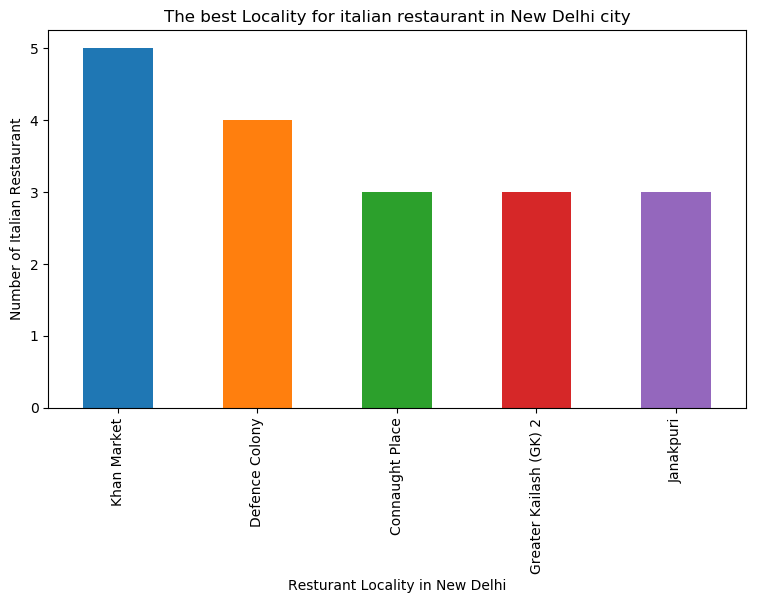

In [33]:
import matplotlib.pyplot as plt
plt.figure(figsize=(9,5), dpi = 100)
# title
plt.title('The best Locality for italian restaurant in New Delhi city')
#On x-axis

#giving a bar plot
df_Res[df_Res['Cuisines'].str.startswith('Italian')].groupby('Locality')['Restaurant Name'].count().nlargest(5).plot(kind='bar')

plt.xlabel('Resturant Locality in New Delhi')
#On y-axis
plt.ylabel('Number of Italian Restaurant')

#displays the plot
plt.show()

<h1>Conclusion<h3>Based on above results, it is clear that italian restaurants are not popular in New Delhi.By examining all the 5 clusters,it is concluded that indian restaurant,pizza place,Hotel and cafe are most common venue in New Delhi but as we want to start an italian restaurant i will decide the the best venue as i can based on above results</h3>
<h3>Based on all the 5 clusters, Garden of Five Senses Saket,Sheikh Sarai,Shangri La's Eros hotel Janpath,Defence Colony,Sunder Nagar have common venues as italian restaurant.Based on Bar graph,Khan market is also the best locality for italian restaurant.<h3> 
